In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from smodels.decomposition.theorySMS import TheorySMS
from smodels.experiment.expSMS import ExpSMS
from smodels.share.models.mssm import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.experiment.defaultFinalStates import finalStates
from smodels.base.model import Model
from collections import OrderedDict
from smodels.base.physicsUnits import fb, GeV
from itertools import product
from smodels.experiment.databaseObj import Database
import copy
from smodels.experiment.expAuxiliaryFuncs import bracketToProcessStr

### Get database

In [2]:
db = Database('official')

In [3]:
exp = db.getExpResults(analysisIDs='ATLAS-SUSY-2016-07',txnames='T6WZh')[0]
tx_orig = exp.getTxNames()[0]
print(tx_orig)

T6WZh


In [4]:
print(tx_orig)
print(tx_orig.constraint)
print('oldDataMap:',tx_orig.dataMap)

T6WZh
[[[jet],[Z]],[[jet],[W]]]+[[[jet],[higgs]],[[jet],[W]]]+[[[jet],[W]],[[jet],[W]]]+[[[jet],[Z]],[[jet],[Z]]]+[[[jet],[higgs]],[[jet],[higgs]]]+[[[jet],[Z]],[[jet],[higgs]]]
oldDataMap: {0: (1, 'mass', 1.00E+00 [GeV]), 1: (2, 'mass', 1.00E+00 [GeV]), 2: (7, 'mass', 1.00E+00 [GeV]), 3: (3, 'mass', 1.00E+00 [GeV]), 4: (4, 'mass', 1.00E+00 [GeV]), 5: (10, 'mass', 1.00E+00 [GeV])}


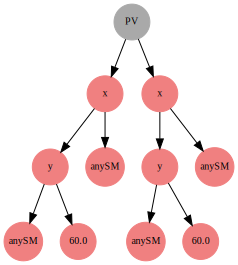

In [8]:
axes = eval(tx_orig.axes,{'x': 'x', 'y' : 'y', 'z' : 'z', 'w' : 'w'})
axesStr = str([[['anySM'] for ptc in br[:-1]] for br in axes])
finalStates = [str(br[-1]) for br in axes]
intermediateStates = [[str(ptc) for ptc in br[:-1]] for br in axes]
axesSMS = ExpSMS.from_string(axesStr,finalState=finalStates,
                          intermediateState=intermediateStates)
axesSMS.draw()

Original:


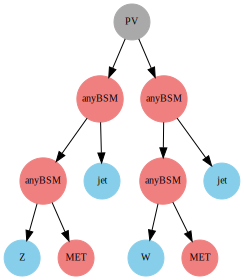

Sorted:


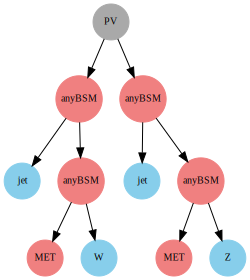

Original:


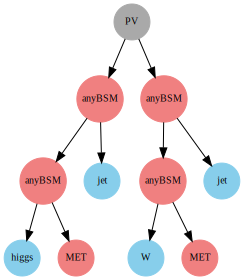

Sorted:


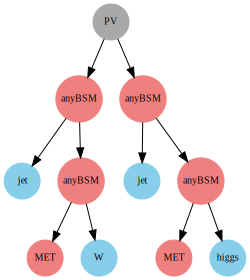

Original:


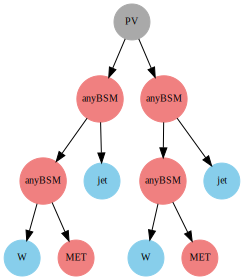

Sorted:


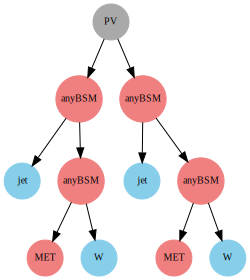

Original:


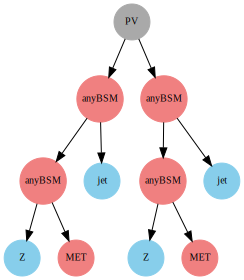

Sorted:


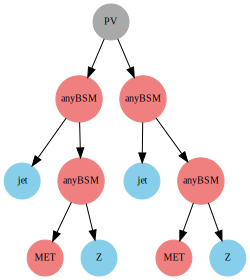

Original:


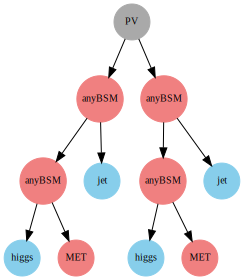

Sorted:


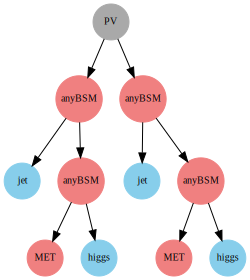

Original:


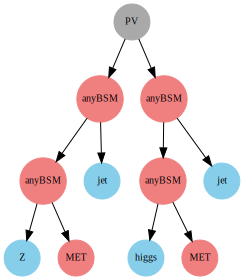

Sorted:


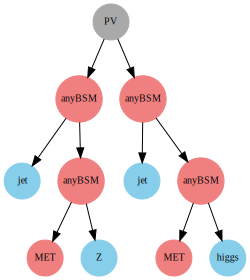

In [14]:
axesDict = None
tx = copy.deepcopy(tx_orig)
relevantNodes = [v[0] for v in tx.dataMap.values()]
axesDict_orig = {node :  str(axesSMS.indexToNode(node)) for node in relevantNodes}
for expSMS in tx.smsMap:
    print('==================')
    print('Original:')
    expSMS.draw()
    newNodesDict = expSMS.sort()
    if axesDict is None:
        axesDict = {newNodesDict[node] : axesDict_orig[node] for node in relevantNodes}
        # print('\t axesDict=',axesDict)
    print('Sorted:')
    expSMS.draw()
    newAxesDict = {newNodesDict[node] : axesDict_orig[node] for node in relevantNodes}

    if newAxesDict != axesDict:
        print('old dict:')
        print(axesDict)
        print('new dict:')
        print(newAxesDict)
        break
    

In [15]:
tx_orig.axes

'[[x, y, 60.0], [x, y, 60.0]]'